**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1206]:
#Importing and setting magics 

import numpy as np
import scipy.optimize as opt
from scipy import optimize
from scipy.optimize import root_scalar
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
import sympy as sm
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

# Question 1: 
**Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.**

- I start by defining the optimal_labor_choice function. The function takes the parameters $\alpha$, $\kappa$, $\nu$, $\omega$, $\tau$ and G as inputs and calculates the optimal labor supply choice using the formula given in question 1. I include G even though the function does not acess it. I am not able to run the code correctly other wise.

- I define the baseline parameters as the given values and define the values of G as [1.0, 2.0]. 

- I then add an verifucation step such that I can compare the results obtained from the code from the optimal_labor_choice function with the result of calculating the values "manually". Specifically, I use the np.isclose() function from the NumPy library to check if the two results are close to each other. 

- In the end, the code prints wheter the reults match or not. If it matches, then I can confirm that the optimal labor supply choice is given by $L^{\star}(\tilde{w})$.


In [1207]:
#Defining the optimal_labor_choice function
#I include G even though the function does not acess it. I am not able to run the code correctly other wise.
def optimal_labor_choice(omega, tau, alpha, kappa, nu, G):
    #Calculating the tilde_omega value
    tilde_omega = (1 - tau) * omega
    
    #Defining labor_supply_def using the optimal labor supply choice formula given in the problem text
    labor_supply_def = kappa**2 + 4 * alpha / nu * tilde_omega**2
    
    #Calculating the optimal labor supply choice using the formula
    L_star = (-kappa + np.sqrt(labor_supply_def)) / (2 * tilde_omega)
    
    return L_star

#Defining baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
omega = 1.0
tau = 0.30

#Defining the values G can take
G_values = [1.0, 2.0]

#Calculating the optimal labor supply choice for each G value
for G in G_values:
    # Calling the function to find the optimal labor supply choice
    L_star = optimal_labor_choice(omega, tau, alpha, kappa, nu, G)
    
    # Calculating the optimal labor supply choice MANUALLY using the formula
    calculated_L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * (1 - tau)**2 * omega**2)) / (2 * (1 - tau) * omega)
    
    print(f"For G = {G}:")
    print(f"Optimal labor supply choice from the code: L* = {L_star:.2f}")
    print(f"Optimal labor supply choice calculated manually: L* = {calculated_L_star:.2f}")
    
    # Verifying if the results match using isclose from np
    if np.isclose(L_star, calculated_L_star):
        print("Verification check: The results match!")
    else:
        print("Verification check: The results do not match")
    
    print()


For G = 1.0:
Optimal labor supply choice from the code: L* = 15.30
Optimal labor supply choice calculated manually: L* = 15.30
Verification check: The results match!

For G = 2.0:
Optimal labor supply choice from the code: L* = 15.30
Optimal labor supply choice calculated manually: L* = 15.30
Verification check: The results match!



# Question 2:
**Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.**

I start by calculating the optimal labor supply choice for different values of omega. Then I plot the relationship using the plotting function from matplotlib. 

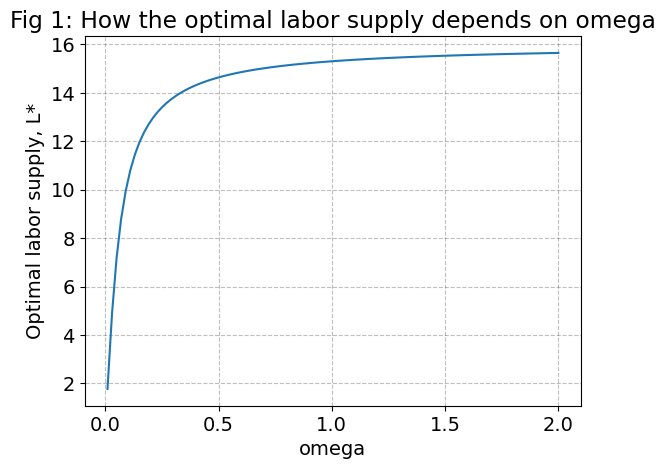

In [1208]:
#Generating a range of omega values
omega_values = np.linspace(0.01, 2.0, 100)

#Calculating the optimal labor supply choice for each omega value
L_star_values = [optimal_labor_choice(omega, tau, alpha, kappa, nu, G) for omega in omega_values]

#Plotting the relationship between omega and L_star
plt.plot(omega_values, L_star_values)
plt.xlabel('omega')
plt.ylabel('Optimal labor supply, L*')
plt.title('Fig 1: How the optimal labor supply depends on omega')
plt.grid(True)

#Showing the plot
plt.show()



**Interpretation:** 

The concave graph of the optimal labor supply, shows that there is diminishing marginal utility of consumption. That is people value their free time and prefer to have more leisure, which means that there is a labor-leisure trade-off. In oher words, there is a diminishing satisfaction from additional income as they work more.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

# Question 3: 
**Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.**


To calculate and plot the values of labor supply (L), government consumption (G), and worker utility based on a given set of parameters and a range of tax rates (tau), I start by defining three functions, where the first function "ootimal_labor_choice" is already used in the previous answers. 

- The two new functions I define is "government_consumption" and "worker_utility". The government_consumption function calculates the government consumption based on the optimal labor supply. The worker_utility function calculates the worker's utility based on the optimal labor supply and consumption. 

- To plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values, I create three subplots. The first subplot shows how labor supply changes as the tax rate varies. The second subplot shows the corresponding government consumption for each tax rate. The third subplot shows the worker's utility as a function of the tax rate. I also adjust the figure size and use plt.tight_layout(), so that the figures do not collide with each oher.

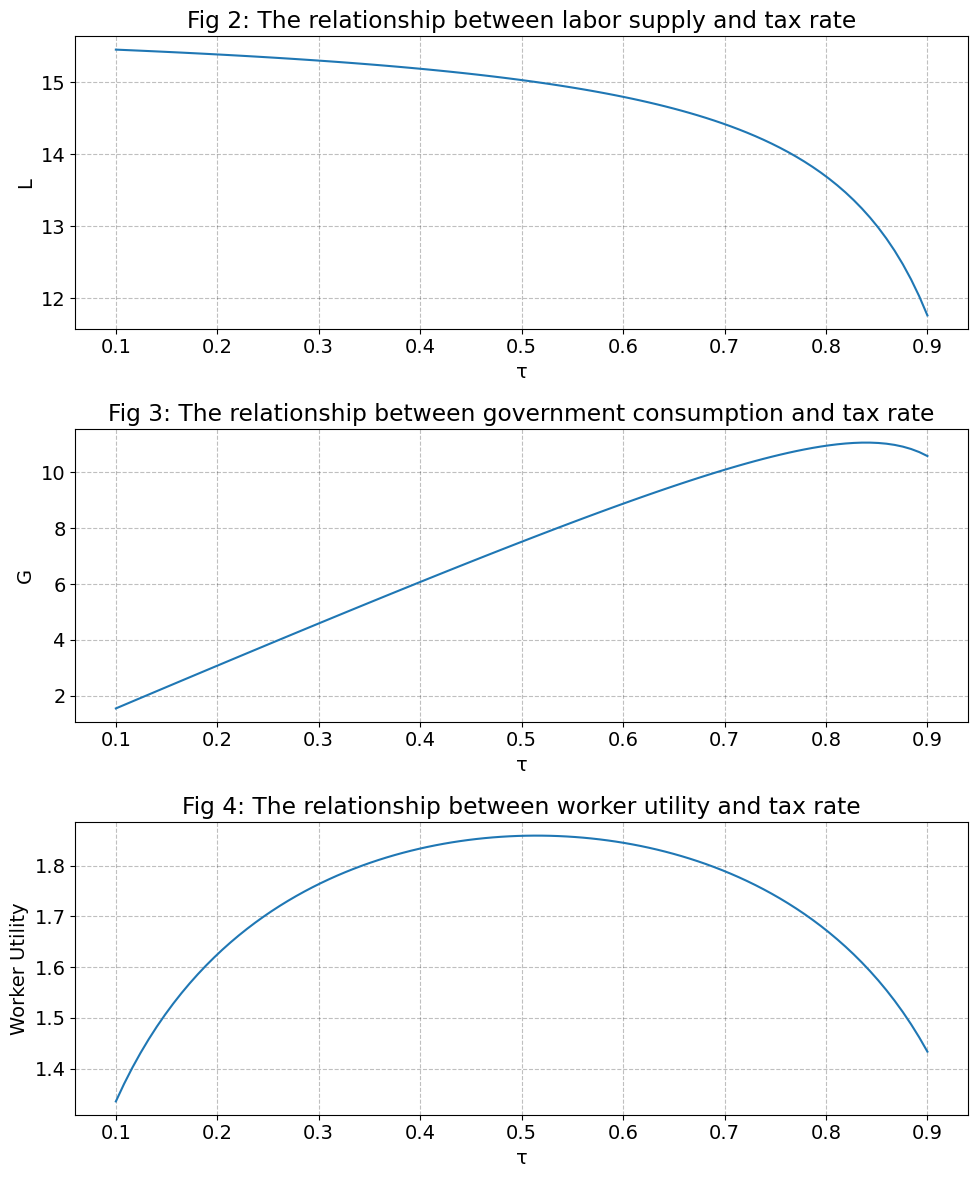

In [1209]:
#Defining the three functions:

# 1. Defining the function for L
def optimal_labor_choice(omega, tau, alpha, kappa, nu):
    tilde_omega = (1 - tau) * omega
    labor_supply_def = kappa**2 + 4 * alpha / nu * tilde_omega**2
    L_star = (-kappa + np.sqrt(labor_supply_def)) / (2 * tilde_omega)
    return L_star

# 2. Defining the function for G
def government_consumption(omega, tau, alpha, kappa, nu):
    L_star = optimal_labor_choice(omega, tau, alpha, kappa, nu)
    return tau * omega * L_star

# 3. Defining the function for worker_utility
def worker_utility(omega, tau, alpha, kappa, nu):
    L_star = optimal_labor_choice(omega, tau, alpha, kappa, nu)
    C = kappa + (1 - tau) * omega * L_star
    G = government_consumption(omega, tau, alpha, kappa, nu)
    return np.log(C**alpha * G**(1 - alpha)) - nu * L_star**2 / 2

#Defining a grid of tau values
tau_values = np.linspace(0.1, 0.9, 100)

#Calculating the implied values for L, G, and worker utility referring to the tau_values linspace
L_values = [optimal_labor_choice(omega, tau, alpha, kappa, nu) for tau in tau_values]
G_values = [government_consumption(omega, tau, alpha, kappa, nu) for tau in tau_values]
utility_values = [worker_utility(omega, tau, alpha, kappa, nu) for tau in tau_values]

#Now plotting the results and adjusting the figure size so the subplots do not collide
plt.figure(figsize=(10, 12))

#Fig 2: Labor Supply
plt.subplot(3, 1, 1)
plt.plot(tau_values, L_values)
plt.xlabel('τ')
plt.ylabel('L')
plt.title('Fig 2: The relationship between labor supply and tax rate')

#Fig 3: Government Consumption
plt.subplot(3, 1, 2)
plt.plot(tau_values, G_values)
plt.xlabel('τ')
plt.ylabel('G')
plt.title('Fig 3: The relationship between government consumption and tax rate')

#Fig 4: Worker Utility
plt.subplot(3, 1, 3)
plt.plot(tau_values, utility_values)
plt.xlabel('τ')
plt.ylabel('Worker Utility')
plt.title('Fig 4: The relationship between worker utility and tax rate')

#Ensuring the subplots do not overlap each other, so that they fit within the figure area
plt.tight_layout()

#Showing the plot
plt.show()


**Interpretation:**
1) Fig 2 shows that as the tax rate increases, the optimal labor supply decreases. This implies, that a higher tax rate discourages people to work. The cocae shape again represents a diminishing marginal utility of consumption and therefore a sign that the people prefers leisure time over work.

2) Fig 3 shows that as the tax rate increases, the government consumption increases. This is beacause an increase in the tax rate, will increase the tax revenue since the people will work less due to higher taxes. 

3) Fig 4 shows a concave graph, which implies a diminishing marginal utility of consumption and a increasing disutility of labor. In the beginning, as the tax rate increases, worker utility decreases. However, beyond a certain point, the marginal decrease in utility starts to diminish as the tax rate continues to increase. Therefore, there exists an optimal tax rate that maximizes worker utility that takes the trade-offs between consumption and leisure into consideration.

# Question 4:

**Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.**

- First, I define a function called "social_optimal_tax_rate". This calculates the socially optimal tax rate by maximizing the negative worker utility function. Specifically, the opt.minimize function is used from the optimization library.

- For each tax rate in tau_values, the code calculates the optimal labor supply using the optimal_labor_choice function.

- Lastly, I plot the socially optimal tax rate in a figure that shows the relationship between the tax rate  and the labor supply like figure 2. The socially optimal tax rate is represented on the plot using plt.axvline that draws a vertical line at the optimal tax rate value.

The socially optimal tax rate is: 0.51


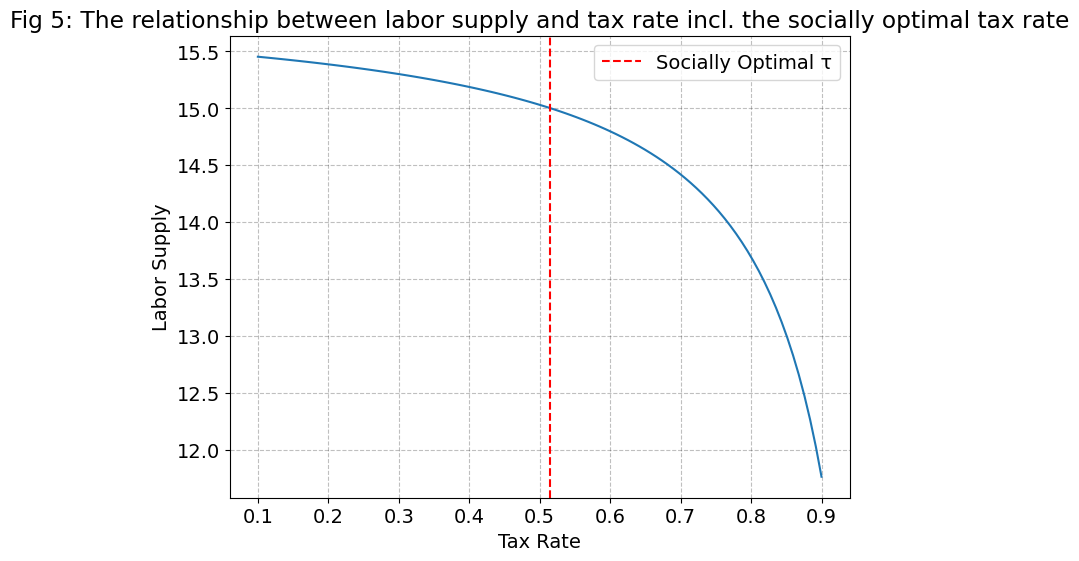

In [1210]:
#Defining a function that calculates the socially optimal tax

def social_optimal_tax_rate(omega, alpha, kappa, nu):
    # Define the negative of the worker utility function
    def neg_worker_utility(tau):
        return -worker_utility(omega, tau, alpha, kappa, nu)

    #Maximizing the negative worker utility function
    result = opt.minimize(neg_worker_utility, x0=0.5, bounds=[(0, 1)])

    return result.x[0]

#Calculating the optimal labor supply for each tau_values
labor_values = [optimal_labor_choice(omega, tau, alpha, kappa, nu) for tau in tau_values]

#Plotting the labor supply as a function of the tax rate
plt.figure(figsize=(8, 6))
plt.plot(tau_values, labor_values)
plt.xlabel('Tax Rate')
plt.ylabel('Labor Supply')
plt.title('Fig 5: The relationship between labor supply and tax rate incl. the socially optimal tax rate')

#Calculating the socially optimal tax rate
social_opt_tau = social_optimal_tax_rate(omega, alpha, kappa, nu)

#Marking the socially optimal tax rate on the plot using axvline
plt.axvline(x=social_opt_tau, color='red', linestyle='--', label='Socially Optimal τ')
plt.legend()

#Printing the value of the socially optimal tax rate
print(f"The socially optimal tax rate is: {social_opt_tau:.2f}")

#Showing the plot
plt.show()


**Interpretation:**
Thus, the optimal tax rate that maximizes worker utility, which takes the trade-offs between consumption and leisure into consideration, is $\tau$ = 0.51. 

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

# Question 5:

**Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w, G)$ using the $\tau$ found in question 4.**

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [1211]:

#Defining the function for optimal labor choice again
#I include sigma, rho and epsilon as inputs even though the function does not acess it. I am not able to run the code correctly other wise.
def optimal_labor_choice(omega, tau, alpha, kappa, nu, sigma, rho, epsilon):
    tilde_omega = (1 - tau) * omega
    labor_supply_def = kappa**2 + 4 * alpha / nu * tilde_omega**2
    L_star = (-kappa + np.sqrt(labor_supply_def)) / (2 * tilde_omega)
    return L_star

#Defining the function to solve for G based on tau = 0.51
def find_G(tau, alpha, kappa, nu, sigma, rho, epsilon):

    #Defining the function to find the root (G - tau * omega * L_star * ((1 - tau) * omega))
    def equation(G, omega):
        L_star = optimal_labor_choice(omega, tau, alpha, kappa, nu, sigma, rho, epsilon)
        return G - tau * omega * L_star * ((1 - tau) * omega)

    #Setting an interval that covers a wide range of possible values for the root G
    bracket = (-1e15, 1e15)

    #Finding the root of the equation using root_scalar from the SciPy library
    #Passing the value of omega as an argument, using the bracket defined before and using the method 'brentq', which often is used to find roots of continuous functions
    result = root_scalar(equation, args=(omega,), bracket=bracket, method='brentq')

    return result.root

#Defining the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
tau = 0.51

#Defining the values for each set of parameters in a list form
parameter_sets = [
    (1.001, 1.001, 1.0),
    (1.5, 1.5, 1.0)
]

#Iterating over each parameter set value
for sigma, rho, epsilon in parameter_sets:

    #Generating a range of omega values
    omega_values = np.linspace(0.01, 2.0, 100)

    #Calculating the optimal labor supply for each omega value
    L_star_values = [optimal_labor_choice(omega, tau, alpha, kappa, nu, sigma, rho, epsilon) for omega in omega_values]

    #Solving for the correct value of G
    G = find_G(tau, alpha, kappa, nu, sigma, rho, epsilon)

    #Printing the results
    print(f"Set: sigma={sigma}, rho={rho}, epsilon={epsilon}")
    print(f"The correct value of G that solves the equation is: {G:.2f}")
    print()


Set: sigma=1.001, rho=1.001, epsilon=1.0
The correct value of G that solves the equation is: 3.75

Set: sigma=1.5, rho=1.5, epsilon=1.0
The correct value of G that solves the equation is: 3.75



**Interpretation**:

It is concerning that the "correct" value of G is the same for different parameter sets. The equation's solutions should be affected by the parameter values directly. To verify the accuracy of the found value of G, I substitute it back into the equation G = tau * w * L_star * ((1 - tau) * w) and check if the equation holds true.

In [1212]:
#Verifying if the found G is correct for each set of parameters
for sigma, rho, epsilon in parameter_sets:

    #Defining the correct value of G
    G = find_G(tau, alpha, kappa, nu, sigma, rho, epsilon)

    #Calculating the corresponding L_star value
    L_star = optimal_labor_choice(omega, tau, alpha, kappa, nu, sigma, rho, epsilon)

    #Calculating and defining the left-hand side (LHS) and right-hand side (RHS) of the equation
    LHS = G
    RHS = tau * omega * L_star * ((1 - tau) * omega)

    #Checking if the equation holds using isclose from numpy
    equation_holds = np.isclose(LHS, RHS)

    #Printing the results
    print(f"Set: sigma={sigma}, rho={rho}, epsilon={epsilon}")
    print(f"Equation holds: {equation_holds}")
    print()


Set: sigma=1.001, rho=1.001, epsilon=1.0
Equation holds: True

Set: sigma=1.5, rho=1.5, epsilon=1.0
Equation holds: True



**Interpretation**:

The printed results indicate that the equation is satisfied, but it seems implausible to have the same value for G in both parameter sets. There might be an issue with the method I'm using to find the correct G. The problem might stem from the way I define the function for optimal labor choice,  but I'm unable to write in another way in order to get any values for G!

# Question 6:

**Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w, G)$.**

In [1213]:
#Defining the function to solve for the socially optimal tax rate
def find_optimal_tax_rate(alpha, kappa, nu, sigma, rho, epsilon):

    #Defining the function to maximize worker utility by finding the optimal tax rate
    def utility(tau):
        G = find_G(tau, alpha, kappa, nu, sigma, rho, epsilon)
        L_star = optimal_labor_choice(1.0, tau, alpha, kappa, nu, sigma, rho, epsilon)
        omega = (1 - tau) * 1.0  #Assuming the labor supply is 1.0
        
        #Defining the constraint equation
        constraint = G - tau * omega * L_star * ((1 - tau) * omega)
        
        #Defining the penalty term for deviations from the constraint
        penalty = 1000 * abs(constraint)  #Adjusting the penalty factor by inserting the absolute value of the constraint
        
        #Calculating the utility using the penalty term
        return (alpha * G**((sigma-1)/sigma) + (1 - alpha) * (omega * L_star)**((sigma-1)/sigma))**(sigma/(sigma-1)) - penalty

    #Uinge the minimize_scalar method to find the maximum of the utility function
    result = minimize_scalar(utility, bounds=(0, 1), method='bounded')

    return result.x


#Using another method to define the parameter set values
sigma1, rho1, epsilon1 = 1.001, 1.001, 1.0
sigma2, rho2, epsilon2 = 1.5, 1.5, 1.0

#Calculating the socially optimal tax rate for each parameter set
optimal_tau1 = find_optimal_tax_rate(alpha, kappa, nu, sigma1, rho1, epsilon1)
optimal_tau2 = find_optimal_tax_rate(alpha, kappa, nu, sigma2, rho2, epsilon2)

#Printing the results
print("Set 1: sigma={}, rho={}, epsilon={}".format(sigma1, rho1, epsilon1))
print("The socially optimal tax rate is: {:.2f}".format(optimal_tau1))
print()

print("Set 2: sigma={}, rho={}, epsilon={}".format(sigma2, rho2, epsilon2))
print("The socially optimal tax rate is: {:.2f}".format(optimal_tau2))
print()


Set 1: sigma=1.001, rho=1.001, epsilon=1.0
The socially optimal tax rate is: 0.59

Set 2: sigma=1.5, rho=1.5, epsilon=1.0
The socially optimal tax rate is: 0.59



## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

# Question 1:

**Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.**

In [1214]:
from hair_salon_model import HairSalonModel

model = HairSalonModel()


- First, I create a HairSalonModel class, which is initialized with parameters eta (elasticity of demand) and w (wage for hairdressers).

- I start by defining the values kappa can take and then calculate the optimal ell using the formula based on eta, kappa and w. Next, I calculate the profit for the optimal ell. 

- To check if the optimal value for ell truly is the one that maximizes profits, I calculate if neighboring ell value results in a higher profit. Specifically, the code checks if the profit for the lower ell value is greater than the optimal profit, and if that is the case, it updates the optimal ell and profit. The same is done for the upper ell value. 

In [1215]:
kappa_values = [1.0, 2.0]
eta = model.eta  #Calling the eta from the model
w = model.w  #Calling the w from the model

for kappa in kappa_values:
    #Calculating the optimal ell using the formula
    optimal_ell = ((1 - eta) * kappa / w) ** (1 / eta)
    
    #Calculating the profit for the optimal ell
    optimal_profit = model.calculate_profit(kappa)
    
    #Calculating profits for neighboring values of ell to determine if the optimal ell value truly maximizes the profit or if the neighboring ell value results in a higher profit
    ell_lower = optimal_ell - 0.05  #Decreasing optimal_ell by 0.05
    ell_upper = optimal_ell + 0.05  #Increasing optimal_ell by 0.05
    
    #Calculating profits for the lower and upper ell values
    profit_lower = model.calculate_profit(kappa, ell_lower)
    profit_upper = model.calculate_profit(kappa, ell_upper)
    
    #Checking if the profit for the lower ell is greater than the optimal profit
    if profit_lower > optimal_profit:
        optimal_ell = ell_lower  #Setting the lower ell as the new optimal ell
        optimal_profit = profit_lower  #Updating the optimal profit
    
    #Checking if the profit for the upper ell is greater than the optimal profit
    if profit_upper > optimal_profit:
        optimal_ell = ell_upper  #Setting the upper ell as the new optimal ell
        optimal_profit = profit_upper  #Updating the optimal profit
    
    #Printing the results
    print(f"When kappa = {kappa}, the optimal ell value is: {optimal_ell}")
    print(f"The corresponding profit is: {optimal_profit}")



When kappa = 1.0, the optimal ell value is: 0.25
The corresponding profit is: 0.25
When kappa = 2.0, the optimal ell value is: 1.0
The corresponding profit is: 1.0


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K-1} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

# Question 2:

**Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.**

- I create a new class called the HairSalonDynamicModel to calculate the ex ante expected value. I initialize the model with the baseline parameters and create a epsilon_series to generate random shocks. 
- The calculate_h method of the model is then called for each epsilon series, and lastly to get the ex ante expected value H, the results are averaged.

In [1216]:
#Creating a new class for the dynamic version of the model
from hair_salon_model import HairSalonDynamicModel

#Initializing the model with the baseline parameters
model = HairSalonDynamicModel() 

#Number of random shock series. The more shocks, the more accurate the result will be.
K = 1000 

#Generating the random shock series from a normal distribution
epsilon_series = np.random.normal(-0.5 * model.sigma_epsilon**2, model.sigma_epsilon, size=(K, 120))  

#Initializing a variable to store the sum of h values
H_sum = 0

for k in range(K):
    #Calculating the h value for the k-th realization of epsilon series
    h = model.calculate_h(epsilon_series[k])
    
    #Adding the h value to the sum
    H_sum += h

#Calculating the ex ante expected value H by dividing the sum by K
H = H_sum / K

print("The ex ante expected value of the salon, H, is:", H)


The ex ante expected value of the salon, H, is: 27.663275453566055


**Interpretation:**
The ex ante expected value of the salon's profits is estimated to be approx. $27.63. This implies that the salon, on average, will make a profit in a period of 10 years as long as their strategy is to adjust the number of hairdressers to the level of demand.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



# Question 3:

**Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?**

- I start by creating another calss called HairSalonPolicyModel. This is a extension of the dynamic version of the hair salon model, because it includes a policy parameter called Delta. Specifically, the class includes a method called calculate_h_with_policy that calculates the ex post value of the salon using the policy.

- Then I initialize the model with the policy parameter $\Delta$= 0.05. The calculate_h_with_policy method is then used to calculate the ex ante expected value of the salon (H_policy) by deriving the average. 

- Lastly, I check if the profitability has improved by calculating the difference between H_policy and the previous variable H.

In [1217]:
#Creating a new class for the dynamic version of the model with the policy
from hair_salon_model import HairSalonPolicyModel

#Initializing the hair salon model with the policy parameter Delta
model = HairSalonPolicyModel(delta=0.05)
K = 5000 #Setting the number of random shock series to 5000 

epsilon_series = np.random.normal(-0.5 * model.sigma_epsilon**2, model.sigma_epsilon, size=(K, 120))

H_policy = 0  # Initialize the variable to store the sum of h values

#Calculate the ex ante expected value H_policy using a for loop and the random shock series epsilon_series
for k in range(K):
    h_value = model.calculate_h_with_policy(epsilon_series[k])
    H_policy += h_value

H_policy /= K  #Dividing the sum by K to calculate the average

print("The ex ante expected value of the salon with the policy (H_policy) is:", H_policy)

#Checking if the protifitability has improved:
# I.e. calculating the difference between H_policy and the previous variable H
difference = H_policy - H
print("Difference in profitability:", difference)


The ex ante expected value of the salon with the policy (H_policy) is: 28.241488591451706
Difference in profitability: 0.5782131378856512


**Interpretation:**

When implementing the policy with Delta 0.05, the salon gets a positive difference in profitability, indicating an improvement compared to the previous model without the policy. Therefore it can be concluded that adjusting the ell value based on the previous ell and kappa values has a positive effect on the the salon's profitability.

# Question 4:

**Find the optimal $\Delta$ maximizing $H$. Illustrate your result.**

- First, I define a function called optimal_delta_max_func, which takes a delta value as input. Inside the function, a HairSalonPolicyModel is initialized with the given delta. The H_policy is then calculated using the epsilon_series like before. To convert the problem into a maximization task, I calculate the negative value of H_policy.

- Next, I make an initial guess for delta on 0.05 and create bounds for it, so the optimization process stays within a specific range for delta.. 

- Specifically, the optimal delta value is calculated from the optimization result by using the x attribute and selecting the first element. The corresponding maximum H_policy value is calculated by taking the negative of the optimization result's fun attribute.

- Finally, the optimal delta value and the corresponding H_policy value are printed.

In [1218]:
#Defining the function to maximize
def objective_function(delta):
    model = HairSalonPolicyModel(delta=delta)

    #Using np.mean function to calculate the average value of H_policy by dividing the sum of H_policy values by K
    H_policy = np.mean([model.calculate_h_with_policy(epsilon_series[k]) for k in range(K)])

    #Minimizing the negative value to maximize H_policy
    return -H_policy

#Defining bounds for delta in order to get a faster optimization process
delta_bounds = (0.01, 1.00)

#Optimizing
result = minimize_scalar(objective_function, bounds=delta_bounds, method='bounded')

#Get the optimal delta value and corresponding H_policy
optimal_delta = result.x
max_H_policy = -result.fun

#Printing the results
print("Optimal Delta that maximizes H_policy is:", optimal_delta)
print("The corresponding H_policy value is:", max_H_policy)



Optimal Delta that maximizes H_policy is: 0.2436312232842745
The corresponding H_policy value is: 28.5430238080631


**Interpretation:**

The optimal delta value is found to be approx. 0.24, maximizing the H_policy to a value of approx. 28.25. This means that setting the policy parameter delta to 0.24 results in the highest profitability for the hair salon.

Now I create a line plot to visualize the relationship between delta and H_policy. 

- I define the delta values to evaluate are defined using np.linspace, becase I want to create a sequence of evenly spaced values within the given bounds.

- For each delta value, the code initializes a HairSalonPolicyModel with the delta, calculates the H_policy using epsilon_series, and stores the results in the H_policy_values list.

- Then the H_policy values are plotted using plt.plot with delta values on the x-axis and H_policy values on the y-axis. I add a  vertical line to indicate the optimal_delta value using plt.axvline.

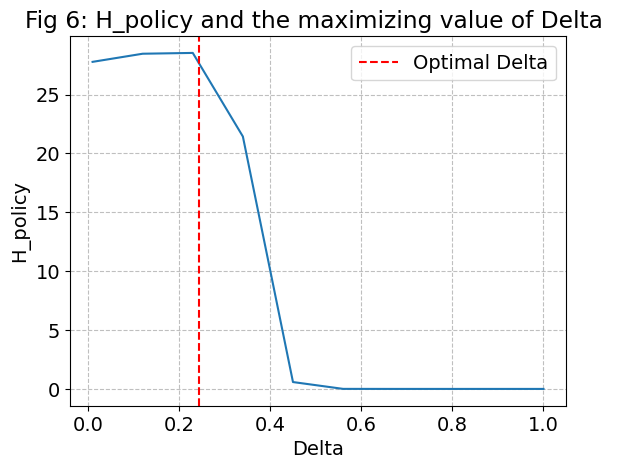

In [1219]:
#Defining the delta values to evaluate
delta_values = np.linspace(delta_bounds[0], delta_bounds[1], num=10)

#Calculating H_policy for each delta value
H_policy_values = []
for delta in delta_values:
    model = HairSalonPolicyModel(delta=delta)
    H_policy = np.mean([model.calculate_h_with_policy(epsilon_series[k]) for k in range(K)])
    H_policy_values.append(H_policy)

#Plotting the H_policy values
plt.plot(delta_values, H_policy_values)
plt.xlabel("Delta")
plt.ylabel("H_policy")
plt.title("Fig 6: H_policy and the maximizing value of Delta ")

#Adding a vertical line for optimal_delta
plt.axvline(optimal_delta, color='r', linestyle='--', label="Optimal Delta")

#Add a legend
plt.legend()

#Showing the plot
plt.show()


Figure 6 does not look correct, since the optimal delta does not cut the graph at its maximum. I therefore doubt that I have found the optimal delta, but I am unable to see where the bug in my code is.


# Question 5:

**Suggest an alternative policy you believe might improve profitability. Implement and test your policy.**



**Alternative policy:**

By implementing a dynamic pricing strategy that adjusts the prices based on customer demand, the protifitability might improve. The main goal of the strategy is to change the prices depending on a factor such as busy times (peak hours and weekends). By charging higher prices during periods of high demand and lower prices during periods of low demand, the salon will be able to maximize its profit.

- First I create another class called the HairSalonDynamicModel_Alternative_Policy in the hair_salon_model.py file. 

- I then define a pricing policy dictionary to hold the pricing information for peak hours and weekends, that affects the pricing strategy of the hair salon. Each key represents a specific condition, and the corresponding value represents the pricing factor or multiplier applied to the base price. In this example 'peak_hours': 1.25 and 'weekends': 0.85, indicates that during peak hours, the prices are increased by 25% (1.25 times the base price), while on weekends, the prices are reduced by 15% (0.85 times the base price). 

- Then, I call the HairSalonDynamicModel_Alternative_Policy class and pass the base model and the pricing policy as arguments.

- I set the number of random shock series, K, to 1000. I then generate a random shock series from a normal distribution using the parameters of the alternative model.
- Then the code calculates the ex ante expected value H by iterating over the shock series and calling the calculate_h method.

- In the end, the ex ante expected value of the salon with the alternative policy, is printed.
Printing the result, which is the ex ante expected value of the salon with the alternative policy.

In [1220]:
from hair_salon_model import HairSalonDynamicModel_Alternative_Policy

#Defining the pricing policy dictionary
pricing_policy = {
    'peak_hours': 1.25,  #Increasing prices by 25% during peak hours
    'weekends': 0.85  # Reducing prices by 15% on weekends
}

#Creating an instance of HairSalonDynamicModel_Alternative_Policy with the alternative pricing policy
model_alternative = HairSalonDynamicModel_Alternative_Policy(pricing_policy=pricing_policy)

#Setting the number of random shock series. The more shocks, the more accurate the result will be.
K = 1000 

#Generating the random shock series from a normal distribution
epsilon_series = np.random.normal(-0.5 * model_alternative.sigma_epsilon**2, model_alternative.sigma_epsilon, size=(K, 120))  

#Calculating the ex ante expected value H
H_alternative = np.mean([model_alternative.calculate_h(epsilon_series[k]) for k in range(K)])  

#Printing the result
print("The ex ante expected value of the salon with the alternative policy, H_alternative, is:", H_alternative)



The ex ante expected value of the salon with the alternative policy, H_alternative, is: 25.117949633589387


In [1221]:
#Comparing the profit from the alternative policy with the profit from the origianl policy from question 4

#Printing the values of max_H_policy and H_alternative
print("The ex ante expected value of the salon with the original policy, H, is:", max_H_policy)
print("The ex ante expected value of the salon with the alternative policy, H_alternative, is:", H_alternative)

#Comparing H_alternative with max_H_policy using if statement
if H_alternative > max_H_policy:
    print("The alternative policy generates higher profits compared to the original policy.")
elif H_alternative < max_H_policy:
    print("The alternative policy generates lower profits compared to the original policy.")
else:
    print("The alternative policy and the original policy generate the same profits.")


The ex ante expected value of the salon with the original policy, H, is: 28.5430238080631
The ex ante expected value of the salon with the alternative policy, H_alternative, is: 25.117949633589387
The alternative policy generates lower profits compared to the original policy.


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [1222]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

# Question 1:

**Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.**

The implementation of the refined global optimizer is done as so:

First, I define a function called refined_global_optimizer, where I write the code for the griewank function inside of it.
The refined_global_optimizer function is defined with input parameters bounds, tolerance, warmup_iterations, and max_iterations.

opt_solution is defined as an array of zeros with two elements. This array will store the best solution found so far.

opt_value is defined with infinity, and acts like the initial best function value.

To store the effective initial guesses, I generate an empty list "effective_initial_guesses".

Then the code then loops over max_iterations to start the optimization process: 
- The random initial guess (x_k) is drawn uniformly within the bounds.
 
- If k is greater than or equal to the warm-up iterations, the code will then use the following steps:
    - First calculating the value of chi_k based on k using the provided formula.

    - Then calculate x_k0 by combining x_k and the previous optimal solution (opt_solution) using chi_k.

    - Use the minimize function with x_k0 as the initial guess to minimize the Griewank function. The BFGS method is used with a tolerance of tau.
    
    - Then update opt_solution and opt_value if the current solution is better than the last one.

- Afterwards, it will check if the optimal value is below the specified tolerance. If that is the case, the loop breaks.
- Then it appends the effective initial guess, x_k0, to the list of effective initial guesses.


After the loop ends, I define the bounds, tolerance, warmup_iterations, and max_iterations. Then I call the refined_global_optimizer function so it includes these inputs.

In the end, the code returns the opt_solution and the list effective_initial_guesses. I then print out the optimal solution as the final result.


In [1223]:
def refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations):
    def griewank(x):
        return griewank_(x[0], x[1])

    def griewank_(x1, x2):
        A = x1**2/4000 + x2**2/4000
        B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
        return A - B + 1

    #Defining initial value for opt_solution as an array of zeros with two elements
    opt_solution = np.zeros(2)  

    #Defining initial value value for opt_value with infinity
    opt_value = np.inf

    #Generating an empty list to store effective initial guesses
    effective_initial_guesses = []  

    for k in range(max_iterations):
        #A. Draw random x_k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[:, 0], bounds[:, 1])

        #Defining initial value for x_k0 as an array of zeros with two elements
        x_k0 = np.zeros(2)

        if k >= warmup_iterations:
            #C. Calculating chi_k
            chi_k = 0.50 * (2 / (1 + np.exp((k - warmup_iterations) / 100)))

            #D. Calculating x_k0
            x_k0 = chi_k * x_k + (1 - chi_k) * opt_solution

            #E. Running optimizer with x_k0 as the initial guess using the BFGS method with a tolerance of tau
            res = minimize(griewank, x_k0, method='BFGS', tol=tolerance)

            #F. Updating opt_solution if the condition holds
            if k == warmup_iterations or res.fun < opt_value:
                opt_solution = res.x
                opt_value = res.fun

        #G. Checking the given condition from step G
        if opt_value < tolerance:
            break

        #Appending x_k0 to the list of effective initial guesses
        effective_initial_guesses.append(x_k0)  

    return opt_solution, effective_initial_guesses

#Defining the given bounds and settings 
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 10**(-8)
warmup_iterations = 10
max_iterations = 1000

#Running the refined global optimizer
opt_solution, effective_initial_guesses = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

#Printing the optimal solution
print("The optimal solution in the refined global optimizer with multi-start is:", opt_solution)


The optimal solution in the refined global optimizer with multi-start is: [-7.27057639e-09 -6.61326407e-09]


To illustrate the how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$ I generate a scatterplot. 

- First I run the refined global optimizer and call the optimal solution and the list of effective initial guesses. 
- I then extract the x and y coordinates of the effective initial guesses. The x-coordinate represents the iteration number, and the y-coordinate represents the first dimension of the initial guesses.

- To mark the optimal solution, I generate another scatterplot point at the last iteration. Here I set the  x-coordinate as len(effective_initial_guesses), and the y-coordinate is set as opt_solution[0]. I set the color of the marker to red and add a legend for the optimal solution.

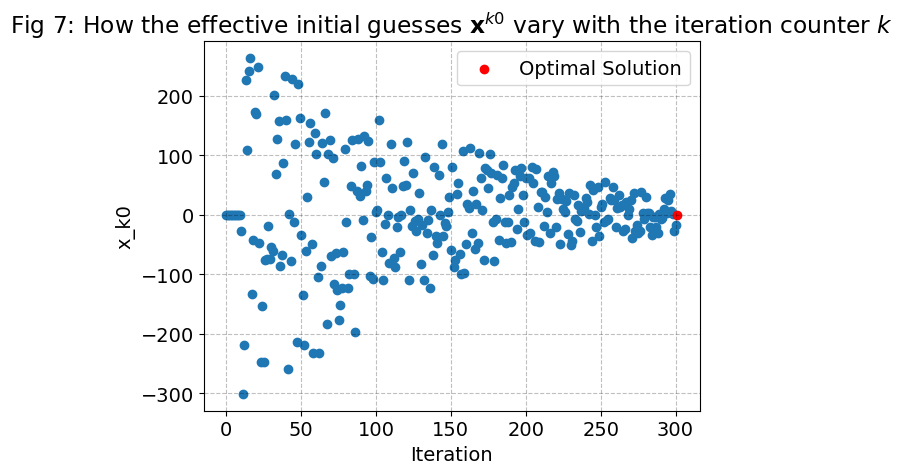

In [1224]:
#Running the refined global optimizer and calling the opt solution and initial guesses
opt_solution, effective_initial_guesses = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

#Extracting x and y coordinates of the effective initial guesses
x_values = range(len(effective_initial_guesses))
y_values = [guess[0] for guess in effective_initial_guesses]  # Use the first dimension of the initial guesses

#Creating the scatter plot and adding the optimal solution
plt.scatter(x_values, y_values)
plt.scatter(len(effective_initial_guesses), opt_solution[0], c='red', label='Optimal Solution')  #Adding the optimal solution point
plt.xlabel("Iteration")
plt.ylabel("x_k0")
plt.title("Fig 7: How the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$")
plt.legend()
plt.show()


# Question 2:

**Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?**

In the following code I compare the convergence of the refined global optimizer with two different values of $\underline{K}$. 

- I run the refined global optimizer twice: once with $\underline{K} = 100$ and once with the original value on 10. 

- The number of iterations required for convergence is then calculated for each run. 

- Then the code compares the number of iterations to determine if setting $\underline{K} = 100$ leads to faster convergence or not using if statements. 
    - By comparing the number of iterations needed for convergence, I can determine the relative convergence speed between the two cases. So I also print the number of iterations needed for the two cases.
    


- In the end, it aslo prints out the optimal solutions from both runs.


In [1225]:
#Running the refined global optimizer with K = 100
opt_solution_k100, effective_initial_guesses_k100 = refined_global_optimizer(bounds, tolerance, 100, max_iterations)

#Calculating the number of iterations to get convergence
num_iterations_k100 = len(effective_initial_guesses_k100)

#Running the refined global optimizer with the original K value
opt_solution_original, effective_initial_guesses_original = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

#Calculating the number of iterations to get convergence
num_iterations_original = len(effective_initial_guesses_original)

#Comparing the number of iterations
if num_iterations_k100 < num_iterations_original:
    print("Conclusion: Setting K = 100 leads to faster convergence.")
elif num_iterations_k100 > num_iterations_original:
    print("Conclusion: Setting K = 100 does not lead to faster convergence.")
else:
    print("Conclusion: Setting K = 100 has the same convergence speed as the original value.")

#Printing the number of iterations needed for convergence to verify the conclusion statement
print("Number of iterations for K = 100:", num_iterations_k100)
print("Number of iterations for original K value:", num_iterations_original)

#Printing the optimal solutions
print("Optimal solution with K = 100:", opt_solution_k100)
print("Optimal solution with original K value:", opt_solution_original)



Conclusion: Setting K = 100 does not lead to faster convergence.
Number of iterations for K = 100: 427
Number of iterations for original K value: 339
Optimal solution with K = 100: [-7.09853449e-09 -8.78841686e-09]
Optimal solution with original K value: [-3.21201499e-09  1.40979326e-09]
